Red neuronal

In [12]:
import yfinance as yf
import tensorflow as tf
import numpy as np
import pandas as pd
from datetime import datetime, timezone

In [38]:
btc_ticker = yf.Ticker("BTC-USD")

In [39]:
btc = btc_ticker.history(period = "max")

In [40]:
btc.columns = [c.lower() for c in btc.columns]

In [41]:
btc.index = pd.to_datetime(btc.index)

In [42]:
btc = btc.reset_index(inplace=False)

In [43]:
def remove_timezone(dt): 
    return dt.replace(tzinfo=None)

btc["Date"] = btc["Date"].apply(remove_timezone)

In [48]:
open = btc["open"]
close = btc["close"]

In [54]:
open

0         465.864014
1         456.859985
2         424.102997
3         394.673004
4         408.084991
            ...     
3033    16836.472656
3034    16952.117188
3035    16954.146484
3036    17093.992188
3037    17203.873047
Name: open, Length: 3038, dtype: float64

In [57]:
# desing the neuronal network 
# making arrays 

#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=200, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=200)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


In [58]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), 
    loss="mean_squared_error"
)

In [61]:
print("comenzando entrenamiento... ")
lenght = 2000
historial = modelo.fit(open[0:lenght], close[0:lenght], epochs=1000, verbose=False)
print("Modelo entrenado")

comenzando entrenamiento... 
Modelo entrenado


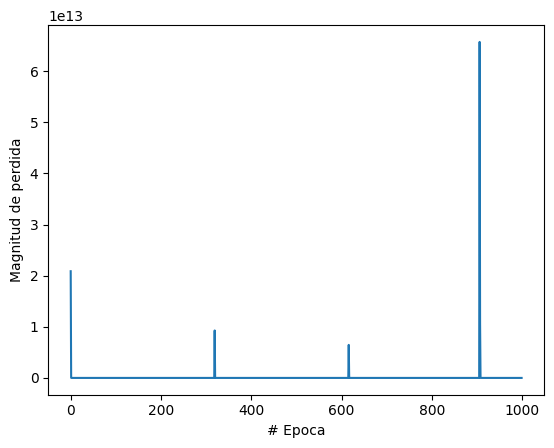

In [63]:
#losser funtion 
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"]) 

